In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio as f
from astropy.table import Table, join, vstack, hstack, unique
import pandas as pd
import glob
from astropy.io import fits
from desitarget.targetmask import bgs_mask, desi_mask, obsconditions
#print(plt.style.available)
#plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#algo=Table(f.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/blanc/v2/BGS_ANY/alltiles_BGS_ANYzinfo.fits'))

In [3]:
#Read GFA_exposures: '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
cols=["PROGRAM","MJD","NIGHT","EXPID"]
expo=Table(f.read('/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_acq_ccds_SV1-thru_20210208.fits',columns=cols))

In [4]:
expo

EXPID,MJD,PROGRAM,NIGHT
int64,float64,str65,int64
64668,59179.26551413,Field acquisition test,20201125
64668,59179.26551412,Field acquisition test,20201125
64668,59179.26551413,Field acquisition test,20201125
64668,59179.26551415,Field acquisition test,20201125
64668,59179.26551415,Field acquisition test,20201125
64668,59179.26551415,Field acquisition test,20201125
64669,59179.27429582,Field acquisition test,20201125
64669,59179.27429582,Field acquisition test,20201125
64669,59179.27429583,Field acquisition test,20201125


In [5]:
# BGS tiles on SV1
expos=pd.DataFrame(np.array(expo), columns=cols)
tiles_BGS_str=np.unique(expos[expos["PROGRAM"].str.contains("BGS")]["PROGRAM"])
np.where(expos[expos["PROGRAM"].str.contains("BGS")]["PROGRAM"])

(array([   0,    1,    2, ..., 2313, 2314, 2315]),)

In [6]:
expo[np.array(expos[expos["PROGRAM"].str.contains("BGS")]["PROGRAM"].index)]
nightspectroid=Table(np.unique(expo[np.array(expos[expos["PROGRAM"].str.contains("BGS")]["PROGRAM"].index)]["PROGRAM","NIGHT","EXPID"]))
nightspectroid

PROGRAM,NIGHT,EXPID
str65,int64,int64
BGS Tile 80646,20210131,73958
BGS Tile 80646,20210131,73959
BGS Tile 80649,20210131,73935
BGS Tile 80649,20210131,73947
BGS Tile 80654,20210131,73918
BGS Tile 80654,20210131,73919
BGS Tile 80658,20210131,73920
BGS Tile 80658,20210131,73921
BGS Tile 80659,20210131,73922


In [7]:
day,tileid,exp=[],[],[]
for i, j in zip(nightspectroid["NIGHT"],nightspectroid["EXPID"]):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/exposures/"+str(i)+"/000"+str(j).format(i,j)
    if glob.glob(path+"/cframe-b0*"):
        hdul = fits.open(glob.glob(path+"/cframe-b0*")[0])
        hdr = hdul[0].header
        day.append(i)
        tileid.append(hdr["TILEID"])
        exp.append(j)
    #fits_image_filename = fits.util.get_testdata_filepath(glob.glob(path+"/cframe-b0*")[0])
        #print(i,j,hdr["TILEID"])
day,tileid,exp=np.array(day),np.array(tileid),np.array(exp)

In [8]:
ctable=Table([day,tileid,exp],names=["NIGHT","TILEID","EXPID"])
#ctable_r=Table(np.unique(ctable["NIGHT","TILEID"]))

In [9]:
# Some problem with: 20210102	80645	70571 (No ZBEST found..!)
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70571)]
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70572)]
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70573)]
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70580)]
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70581)]
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70582)]
ctable

NIGHT,TILEID,EXPID
int64,int64,int64
20210131,80646,73958
20210131,80646,73959
20210131,80649,73935
20210131,80649,73947
20210131,80654,73918
20210131,80654,73919
20210131,80658,73920
20210131,80658,73921
20210131,80659,73922


In [10]:
print("========================Observations Notes========================")
print("WE have",len(list(set(ctable["TILEID"]))), " tiles on blanck observations")
print("WE have",len(list(set(ctable["EXPID"]))), "exposures on blanck observations")
print("WE have",len(list(set(ctable["NIGHT"]))), "night on blanck observations until",str(np.max(list(set(ctable["NIGHT"])))))

========================Observations Notes========================
WE have 38  tiles on blanck observations
WE have 330 exposures on blanck observations
WE have 16 night on blanck observations until 20210131


In [11]:
def search(date,tile,expid):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/{}/{}".format(tile,date)
    zbest_files = glob.glob(path+"/zbest-*")
    #print(len(zbest_files))
    zbest_data = {}
    zbest_fibermap = {}
    for i, zbest_file in enumerate(zbest_files):
        #print(zbest_file)
        zbest_data[i] = Table.read(zbest_file, 'ZBEST')
        zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    zbest_data_all = vstack(list(zbest_data.values()))
    zbest_data_all.sort('TARGETID')
    fibermap_all = vstack(list(zbest_fibermap.values()))
    fibermap_all = fibermap_all[fibermap_all["EXPID"]==expid]
    fibermap_all.sort('TARGETID')
    #print(len(zbest_data_all),len(fibermap_all))
    return len(zbest_data_all), len(fibermap_all)

In [12]:
lzbest,lfibermap=[],[]
for i in range(len(ctable)):
    ii=ctable["NIGHT"][i]
    jj=ctable["TILEID"][i]
    kk=ctable["EXPID"][i]
    #print(i,ii,jj,kk,search(ii,jj,kk)[0],search(ii,jj,kk)[1])
    lzbest.append(search(ii,jj,kk)[0])
    lfibermap.append(search(ii,jj,kk)[1])
lzbest,lfibermap=np.array(lzbest),np.array(lfibermap)
ctable["LZBEST"]=lzbest
ctable["LFIBERMAP"]=lfibermap
ctable=ctable[ctable["LZBEST"]==ctable["LFIBERMAP"]]

In [13]:
ctable

NIGHT,TILEID,EXPID,LZBEST,LFIBERMAP
int64,int64,int64,int64,int64
20210131,80646,73958,4500,4500
20210131,80646,73959,4500,4500
20210131,80649,73935,4500,4500
20210131,80649,73947,4500,4500
20210131,80654,73918,4500,4500
20210131,80654,73919,4500,4500
20210131,80658,73920,4500,4500
20210131,80658,73921,4500,4500
20210131,80659,73922,4500,4500


## Redshift sucessful..!

In [14]:
def redshift_success_rate(date,tile,expid,r_mag_min_bin=15.5,r_mag_max_bin=22):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/{}/{}".format(tile,date)
    zbest_files = glob.glob(path+"/zbest-*")
    #print(len(zbest_files))
    zbest_data = {}
    zbest_fibermap = {}
    for i, zbest_file in enumerate(zbest_files):
        zbest_data[i] = Table.read(zbest_file, 'ZBEST')
        zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    zbest_data_all = vstack(list(zbest_data.values()))
    zbest_data_all.sort('TARGETID')
    fibermap_all = vstack(list(zbest_fibermap.values()))
    fibermap_all = fibermap_all[fibermap_all["EXPID"]==expid]
    fibermap_all.sort('TARGETID')
    flux_r = fibermap_all['FLUX_R']#/fibermap_all['MW_TRANSMISSION_R']
    fibermap_all["rmag"] = np.where(flux_r<=0,np.nan,22.5-2.5*np.log10(flux_r))
    good_indices_rmag = ~((np.isnan(fibermap_all["rmag"]))|(np.isinf(fibermap_all["rmag"])))
    delta_r = 0.5
    #r_mag_min_bin,r_mag_max_bin=15.5,21
    r_mag_bins = np.arange(r_mag_min_bin,r_mag_max_bin, delta_r)
    #r_mag_bins = np.arange(18, 23.0, delta_r)
    z_warn0_frac = np.ones(len(r_mag_bins))
    z_warn0_frac_err = np.ones(len(r_mag_bins))
    Nn_tot=np.ones(len(r_mag_bins))
    Nn_no_warn=np.ones(len(r_mag_bins))
    for i,r_min in enumerate(r_mag_bins):
        #print(r_min)
        r_max = r_min + delta_r
        ii = (fibermap_all["rmag"]>r_min) & (fibermap_all["rmag"]<r_max)
        is_galaxy = zbest_data_all[ii]['SPECTYPE']=='GALAXY' 
        no_warning = zbest_data_all[ii]['ZWARN']==0
        good_fiber = fibermap_all[ii]['FIBERSTATUS']==0

        n_tot = np.count_nonzero(is_galaxy)
        n_no_warn = np.count_nonzero(no_warning & is_galaxy)
        if n_tot>0:
            Nn_no_warn[i]=n_no_warn
            Nn_tot[i]=n_tot
            z_warn0_frac[i] = n_no_warn/n_tot
            z_warn0_frac_err[i] = np.sqrt(n_no_warn)/n_tot/2
    return r_mag_bins, z_warn0_frac, z_warn0_frac_err, Nn_no_warn, Nn_tot

In [15]:
def plot_redshift_success_rate(date,tile,expid,r_mag_min_bin=15.5,r_mag_max_bin=22):
    #plt.figure(figsize=(8,5))
    plt.errorbar(redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[0], 
                 redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[1],
                 redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[2], 
                 capsize=1, fmt='o--', label=str(tile)+"-"+str(date)+"-"+str(expid), linewidth=1)
    plt.ylim([0,1.1])
    plt.xlabel('RMAG')
    plt.ylabel('FRACTION ZWARN==0')
    plt.legend()
    plt.grid()
    #plt.show()
    #return plt.show()

In [16]:
redshift_success_rate(20210131,80646,73958,15,21)

(array([15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
        20.5]),
 array([1.        , 1.        , 1.        , 1.        , 0.97297297,
        1.        , 1.        , 0.96256684, 0.93297587, 0.90925926,
        0.85834334, 0.77073171]),
 array([0.5       , 0.28867513, 0.16666667, 0.10425721, 0.08108108,
        0.05735393, 0.04767313, 0.03587275, 0.02500638, 0.02051715,
        0.01605011, 0.03065806]),
 array([  1.,   3.,   9.,  23.,  36.,  76., 110., 180., 348., 491., 715.,
        158.]),
 array([  1.,   3.,   9.,  23.,  37.,  76., 110., 187., 373., 540., 833.,
        205.]))

In [17]:
ctable_r=unique(ctable, keys=['NIGHT','TILEID'], keep='first')
print(np.unique(ctable_r["NIGHT"]))
ctable_r

 NIGHT  
--------
20201218
20201219
20201220
20201221
20201222
20201223
20210101
20210102
20210103
20210105
20210106
20210107
20210108
20210109
20210110
20210131


NIGHT,TILEID,EXPID,LZBEST,LFIBERMAP
int64,int64,int64,int64,int64
20201218,80612,68644,5000,5000
20201218,80613,68657,5000,5000
20201218,80614,68684,5000,5000
20201218,80617,68619,4500,4500
20201218,80619,68672,5000,5000
20201219,80612,68824,5000,5000
20201219,80616,68790,5000,5000
20201219,80617,68799,5000,5000
20201219,80618,68837,5000,5000


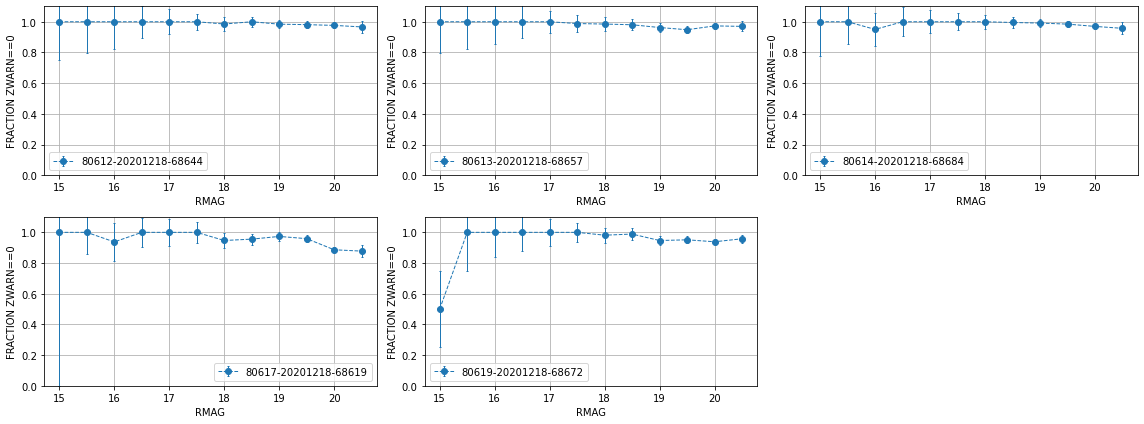

In [39]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plot_redshift_success_rate(20201218,80612,68644,15,21)
plt.subplot(2,3,2)
plot_redshift_success_rate(20201218,80613,68657,15,21)
plt.subplot(2,3,3)
plot_redshift_success_rate(20201218,80614,68684,15,21)
plt.subplot(2,3,4)
plot_redshift_success_rate(20201218,80617,68619,15,21)
plt.subplot(2,3,5)
plot_redshift_success_rate(20201218,80619,68672,15,21)
plt.tight_layout()
plt.show()

In [19]:
def select_by_night(night):
    N=len(ctable_r[ctable_r["NIGHT"]==night])
    data=ctable_r[ctable_r["NIGHT"]==night]
    return data

In [20]:
def plot_by_night(night):
    N=len(select_by_night(night))
    plt.figure(figsize=(10,6))
    for i in range(N):
        plt.subplot()
        plot_redshift_success_rate(select_by_night(night)["NIGHT"][i],
                               select_by_night(night)["TILEID"][i],
                               select_by_night(night)["EXPID"][i],15,21)
        plt.legend(title="NIGHT="+str(night),ncol=2)

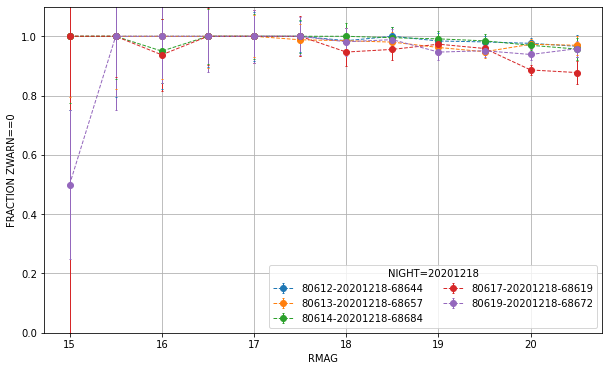

In [21]:
plot_by_night(20201218)

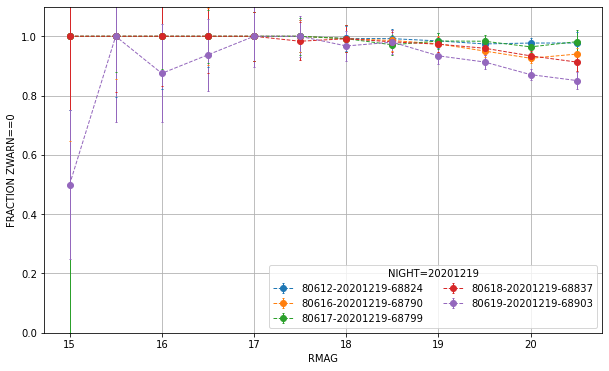

In [22]:
plot_by_night(20201219)

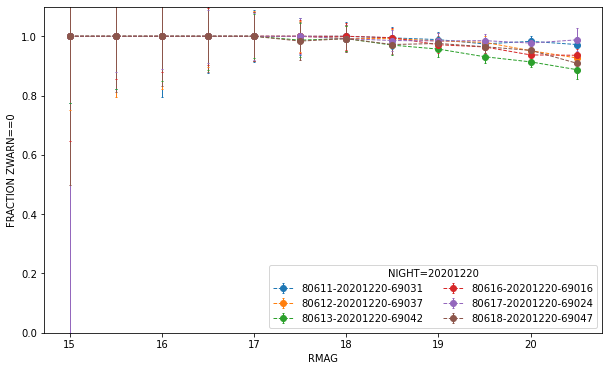

In [23]:
plot_by_night(20201220)

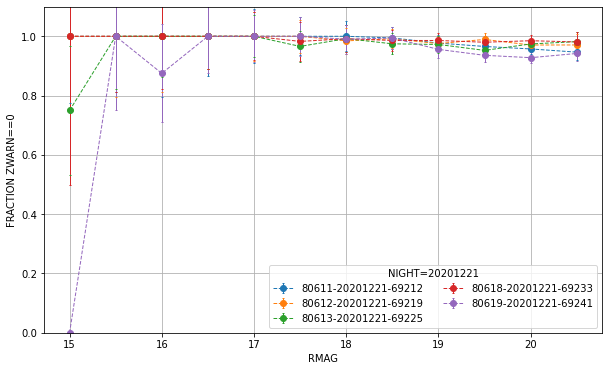

In [24]:
plot_by_night(20201221)

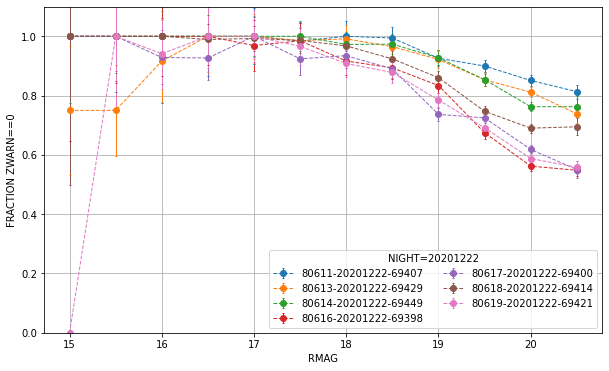

In [25]:
plot_by_night(20201222)

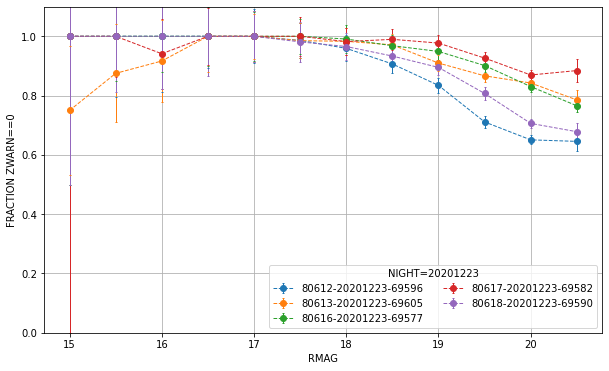

In [26]:
plot_by_night(20201223)

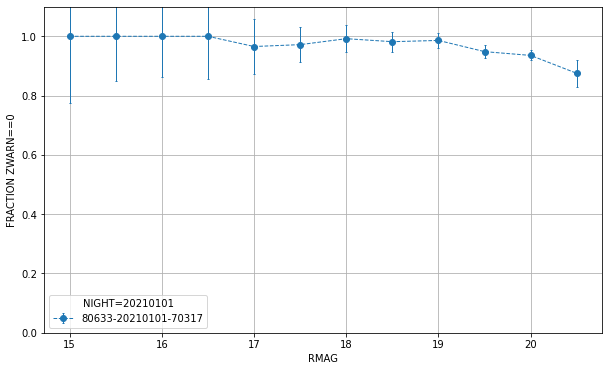

In [27]:
plot_by_night(20210101)

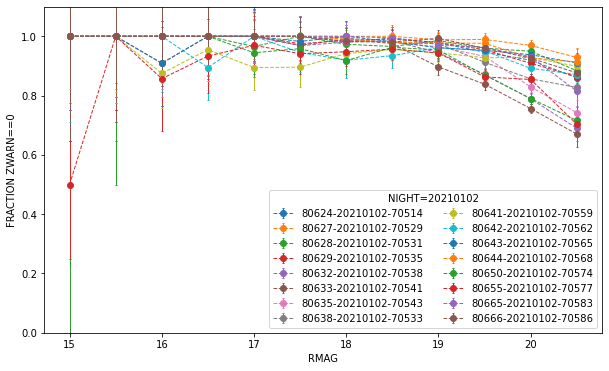

In [28]:
plot_by_night(20210102)

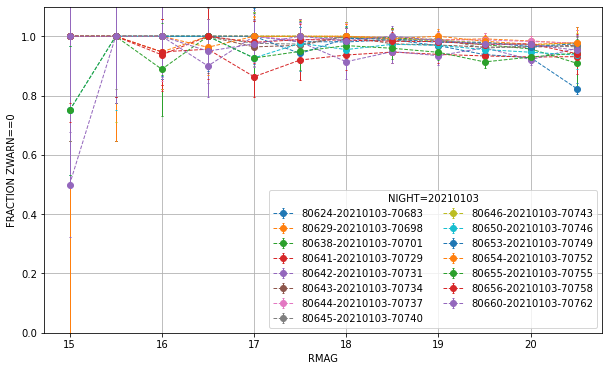

In [29]:
plot_by_night(20210103)

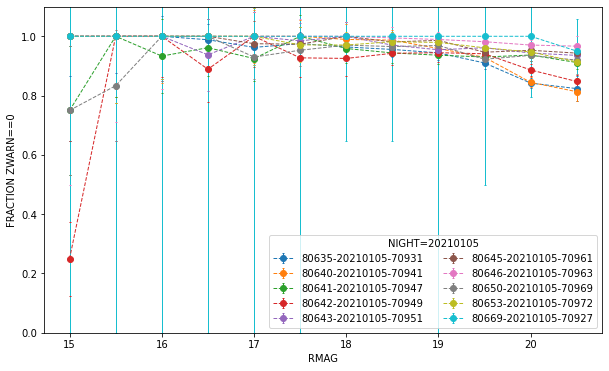

In [30]:
plot_by_night(20210105)

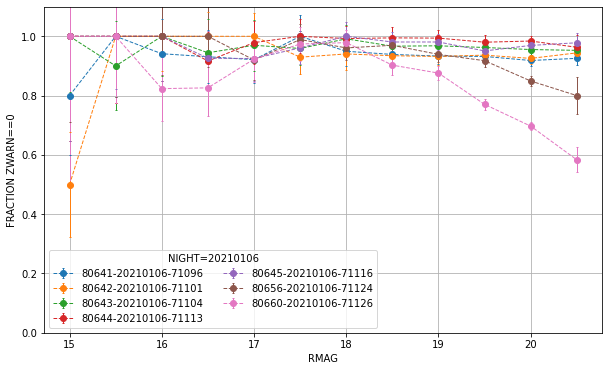

In [31]:
plot_by_night(20210106)

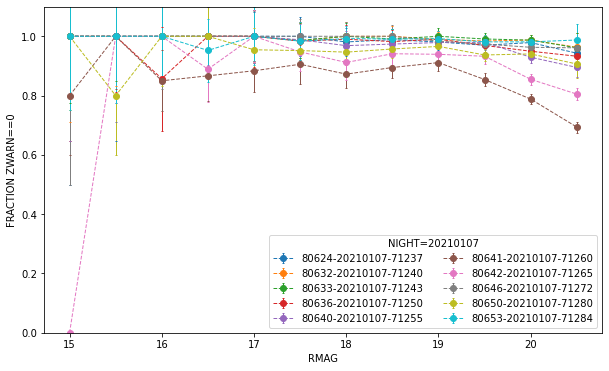

In [32]:
plot_by_night(20210107)

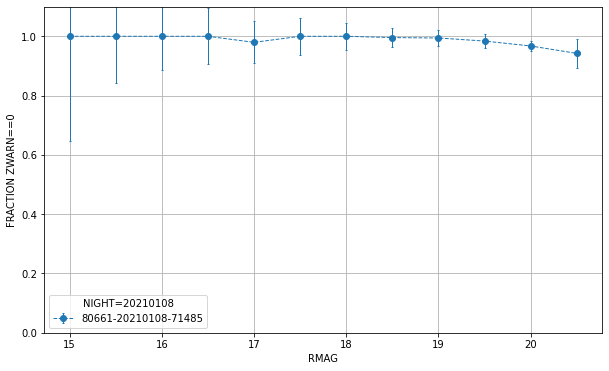

In [33]:
plot_by_night(20210108)

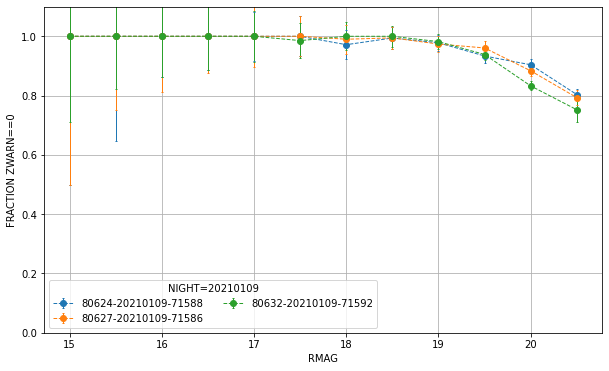

In [34]:
plot_by_night(20210109)

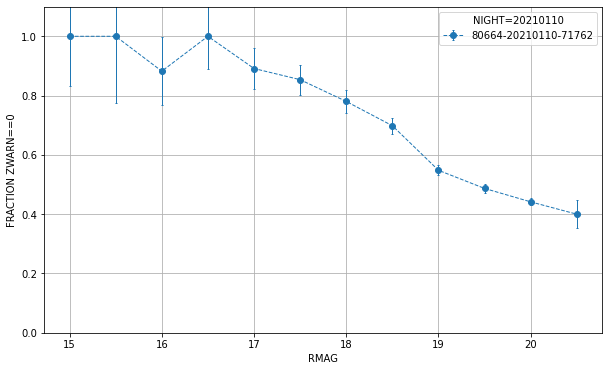

In [35]:
plot_by_night(20210110)

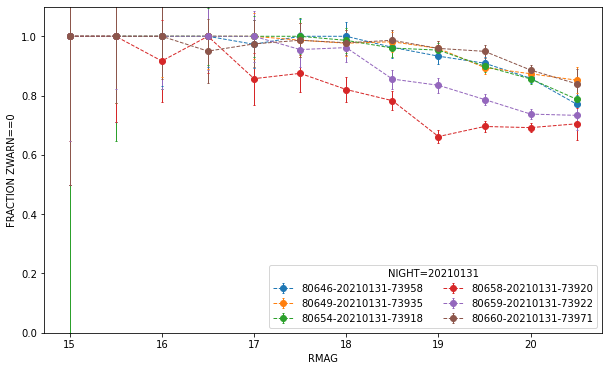

In [36]:
plot_by_night(20210131)